# Homework 0

**Name:** -- Roberto José González --

**e-mail:** -- roberto.jose0745@alumnos.udg.mx --

# Modules

In [2]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt

# Theory on the *gradient descent* algorithm

**Gradient descent** is an optimization algorithm used to find the local minimum of a function by iteratively moving in the direction of the negative gradient. The update rule is:

$$
x_{t+1} = x_t - \alpha \frac{\partial f}{\partial x}, \quad y_{t+1} = y_t - \alpha \frac{\partial f}{\partial y}
$$

where:
- \$ (x_t, y_t) \$ is the current position,
- \$\alpha \$ is the learning rate,
- \$ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \$ are the partial derivatives.

The algorithm stops when the change in function value is very small or after a set number of iterations.



# Function to be optimized  

The function to be optimized is the **Himmelblau function**, defined as:  

$$
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
$$

The gradient of the function is given by:  

$
\frac{\partial f}{\partial x} = 2 (x^2 + y - 11) \cdot 2x + 2 (x + y^2 - 7)
$

$
\frac{\partial f}{\partial y} = 2 (x^2 + y - 11) + 2 (x + y^2 - 7) \cdot 2y
$

This gradient will be used in the **Gradient Descent Algorithm** to iteratively find a local minimum.


In [3]:
# Function to be optimized
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Gradient of the function
def gradient(x, y):
    df_dx = 2 * (x**2 + y - 11) * 2 * x + 2 * (x + y**2 - 7)
    df_dy = 2 * (x**2 + y - 11) + 2 * (x + y**2 - 7) * 2 * y
    return np.array([df_dx, df_dy])


# Running the gradient descent algorithm  

The **gradient descent algorithm** is used to iteratively update $ x $ and $ y $ in the direction of the negative gradient to minimize the Himmelblau function. The update rule is given by:  

$$
x_{t+1} = x_t - \alpha \frac{\partial f}{\partial x}
$$

$$
y_{t+1} = y_t - \alpha \frac{\partial f}{\partial y}
$$

where:  
- $ (x_t, y_t) $ is the current position,  
- $ \alpha $ is the learning rate,  
- $ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} $ are the partial derivatives of the function.  

# Stopping criteria  
The algorithm stops when either:  
1. The maximum number of iterations (**max_iters**) is reached.  
2. The change in position is smaller than a predefined tolerance (**tol**), computed as:  

$$
\sqrt{(x_{t+1} - x_t)^2 + (y_{t+1} - y_t)^2} < \text{tol}
$$

The function returns the history of all positions visited during optimization.


In [4]:
# Run gradient descent algorithm
def gradient_descent(start_x, start_y, learning_rate=0.01, max_iters=1000, tol=1e-6):

    # Initialize (x, y) with the given starting point
    x, y = start_x, start_y

    # Store the history of positions for visualization
    history = [(x, y)]

    # Iterate up to max_iters times
    for i in range(max_iters):
        # Partial derivatives
        grad = gradient(x, y)

        # Update x and y based on the gradient descent rule
        x_new = x - learning_rate * grad[0]
        y_new = y - learning_rate * grad[1]

        # Save the new position
        history.append((x_new, y_new))

        # Convergence checking:
        # Stop if the change in position is smaller than the tolerance
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break  # Exit the loop

        # Update (x, y) for the next iteration
        x, y = x_new, y_new

    # Convert history list to a NumPy array for easier processing
    return np.array(history)


Local minimum found at: (3.0000, 2.0000)


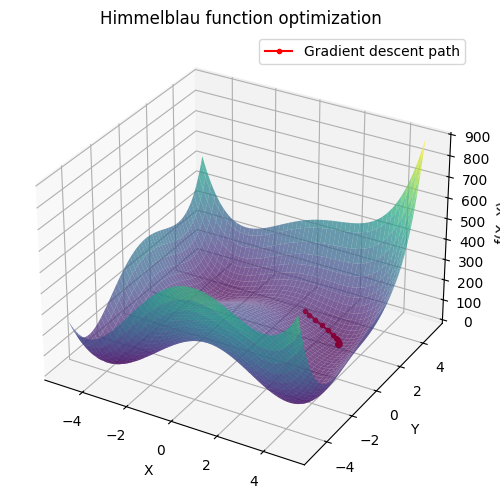

In [5]:
# Main
# Initial point
start_x, start_y = np.random.uniform(-5, 5, 2)
trajectory = gradient_descent(start_x, start_y)

# Final point
final_x, final_y = trajectory[-1]
print(f"Local minimum found at: ({final_x:.4f}, {final_y:.4f})")

# Plot the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Grid for function surface
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = himmelblau(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Plot gradient descent path
Z_traj = himmelblau(trajectory[:, 0], trajectory[:, 1])
ax.plot(trajectory[:, 0], trajectory[:, 1], Z_traj, color='r', marker='o', markersize=3, label="Gradient descent path")

# Labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(X, Y)")
ax.set_title("Himmelblau function optimization")

plt.legend()
plt.show()


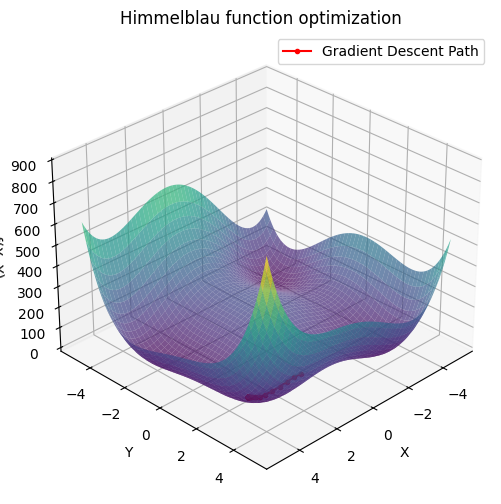

In [6]:
# Interactive 3D Plot
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Grid for function surface
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = himmelblau(X, Y)

# Plot the Himmelblau function surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# Plot gradient descent path
Z_traj = himmelblau(trajectory[:, 0], trajectory[:, 1])
ax.plot(trajectory[:, 0], trajectory[:, 1], Z_traj, color='r', marker='o', markersize=3, label="Gradient descent path")

# Labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(X, Y)")
ax.set_title("Himmelblau function optimization")

# Enable interactive rotation
ax.view_init(elev=30, azim=45)  # Set initial angle
plt.legend()
plt.show()
